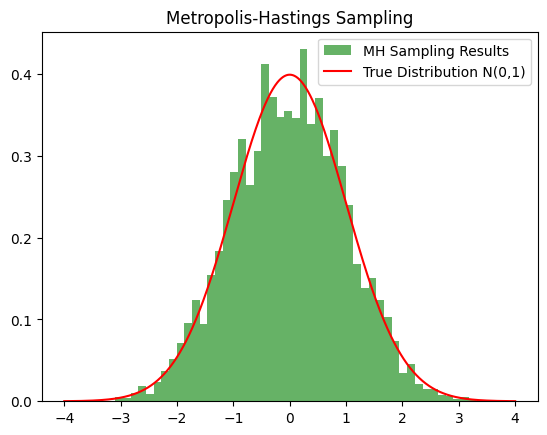

In [38]:
import torch
import matplotlib.pyplot as plt
from scipy.stats import norm

# Target distribution (standard normal distribution)
def target_distribution(x):
    return norm.pdf(x, loc=0, scale=1)  # Standard normal PDF

# Metropolis-Hastings sampling
def metropolis_hastings(target_pdf, proposal_std, num_samples, init_x=0):
    samples = []
    x = torch.tensor(init_x, dtype=torch.float32)
    
    for _ in range(num_samples):
        # Sample new candidate x' from the proposal distribution q(x' | x) = N(x, proposal_std)
        x_proposal = torch.normal(mean=x, std=torch.tensor(proposal_std))

        # Calculate acceptance ratio A
        acceptance_ratio = min(1, target_pdf(x_proposal.item()) / target_pdf(x.item()))
        
        # Accept new sample with probability A
        if torch.rand(1).item() < acceptance_ratio:
            x = x_proposal

        samples.append(x.item())
    
    return torch.tensor(samples)

# Sampling
samples = metropolis_hastings(target_distribution, proposal_std=4.0, num_samples=10000)

# Plot histogram
x_vals = torch.linspace(-4, 4, 1000)
p_vals = target_distribution(x_vals.numpy())

plt.hist(samples.numpy(), bins=50, density=True, alpha=0.6, label="MH Sampling Results", color="green")
plt.plot(x_vals.numpy(), p_vals, 'r-', label="True Distribution N(0,1)")
plt.legend()
plt.title("Metropolis-Hastings Sampling")
plt.show()


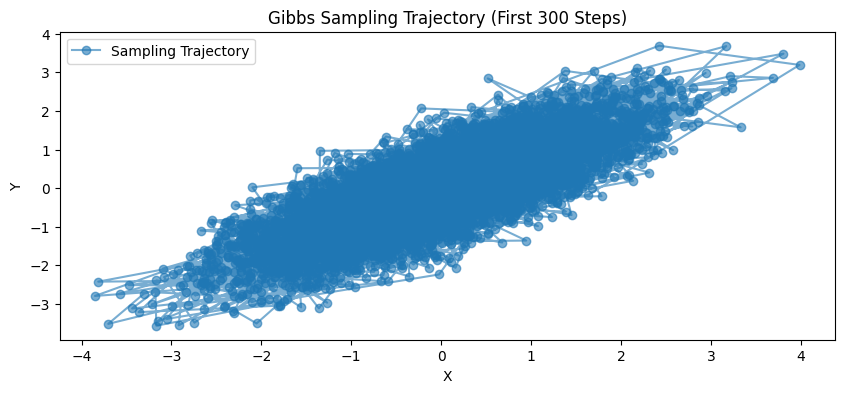

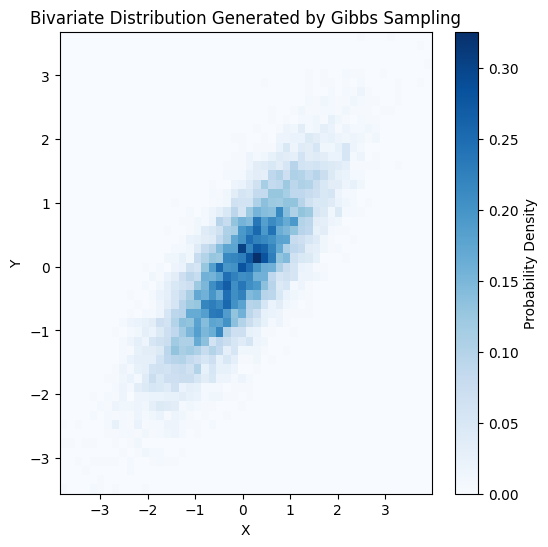

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters for the bivariate normal distribution
mu_x, mu_y = 0, 0  # Means
sigma_x, sigma_y = 1, 1  # Standard deviations
rho = 0.8  # Correlation coefficient

# Calculate the standard deviations of the conditional distributions
sigma_x_given_y = np.sqrt(1 - rho**2) * sigma_x
sigma_y_given_x = np.sqrt(1 - rho**2) * sigma_y

# Gibbs sampling function
def gibbs_sampling(num_samples, burn_in=100, init_x=0, init_y=0):
    samples = np.zeros((num_samples + burn_in, 2))
    x, y = init_x, init_y  # Initialize state

    for i in range(num_samples + burn_in):
        # Step 1: Sample x from p(x | y)
        mu_x_given_y = mu_x + rho * (sigma_x / sigma_y) * (y - mu_y)
        x = np.random.normal(mu_x_given_y, sigma_x_given_y)

        # Step 2: Sample y from p(y | x)
        mu_y_given_x = mu_y + rho * (sigma_y / sigma_x) * (x - mu_x)
        y = np.random.normal(mu_y_given_x, sigma_y_given_x)

        samples[i] = [x, y]

    return samples[burn_in:]  # Discard burn-in samples

# Run Gibbs sampling
num_samples = 10000
samples = gibbs_sampling(num_samples)

# 1️⃣ Visualize the trajectory of Gibbs sampling
plt.figure(figsize=(10, 4))
plt.plot(samples[:, 0], samples[:, 1], marker="o", linestyle="-", alpha=0.6, label="Sampling Trajectory")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Gibbs Sampling Trajectory (First 300 Steps)")
plt.show()

# 2️⃣ Plot the final bivariate distribution
plt.figure(figsize=(6, 6))
plt.hist2d(samples[:, 0], samples[:, 1], bins=50, density=True, cmap="Blues")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Bivariate Distribution Generated by Gibbs Sampling")
plt.colorbar(label="Probability Density")
plt.show()
